In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import stdb
import matplotlib
import os, glob

In [8]:
datapath = 'DATA_SKS_Model'
time = '20220225_105927'
datadir = f'{datapath}/XX.MOD/{time}'
FD=0

In [14]:
def readPKL(bazpath):
    metafile = f'{bazpath}/Meta_data.pkl'
    RCfile = f'{bazpath}/RC_res.pkl'
    SCfile = f'{bazpath}/SC_res.pkl'
    meta = pickle.load(open(metafile, "rb"))
    RC = pickle.load(open(RCfile, "rb"))
    SC = pickle.load(open(SCfile, "rb"))
    return meta, RC, SC

def phiPlot(ax):
    ax.set_ylabel('Fast Direction (°)',fontsize=15)
    ax.set_xlabel('Backazimuth (°)',fontsize=15)
    ax.set_xlim(0,360)
    ax.set_ylim(-90,90)
    ax.grid(axis='y',color='lightgrey',lw=1)
    ax.set_xticks(range(0,361,30))
    ax.set_yticks(range(-90,91,30))
    ax.vlines(x=[90,180,270],ymin=-90,ymax=90,color='lightgrey',lw=1)
def dtPlot(ax,dtmean=None,dterror=None):
    ax.set_ylabel('dt (s)',fontsize=15)
    ax.set_xlabel('Backazimuth (°)',fontsize=15)
    ax.set_xlim(0,360)
    ax.set_ylim(0,4.2)
    ax.grid(axis='y',color='lightgrey',lw=1)
    ax.set_yticks(np.arange(0,4.1,0.5))
    ax.set_yticklabels(['0','0.5','1','1.5','2','2.5','3','3.5','4'])
    ax.set_xticks(range(0,361,30))
    ax.vlines(x=[90,180,270],ymin=0,ymax=4.2,color='lightgrey',lw=1)
class Meta(object):
    def __init__(self,time=time,baz=0):
        self.time = UTCDateTime(time)
        self.baz = int(baz)
        self.lon = 0
        self.lat = 0
        self.dep = 100
        self.mag = 7.0
        self.epi_dist = 120*111
        self.gac = 120
        self.az = 360-int(baz)
        self.ttime = ttime
        self.slow = 0.04
        self.inc = 0
        self.phase = 'SKS'
        self.accept = True
        self.snrq = 10.0
        self.snrt = 5.0
        self.maxdt = 4.0
        self.ddt = 0.1
        self.dphi = 1
        self.align = 'LQT'
        self.rotated = False
        self.CpH = None
        self.fmin=0.05
        self.fmax=0.125

In [15]:
result = {'baz':[],'CpH':[],
        'RCphi':[],
        'RCdphi':[],
        'RCdt':[],
        'RCddt':[],
        'SCphi':[],
        'SCdphi':[],
        'SCdt':[],
        'SCddt':[]}
for bazpath in glob.glob(f'{datadir}/baz*'):
    print(bazpath)
    baz = int(bazpath.rsplit('_')[-1])
    result['baz'].append(baz)
    try:
        meta, RC, SC= readPKL(bazpath)
        result['CpH'].append(meta.CpH)
        result['RCphi'].append(RC.phi)
        result['RCdphi'].append(RC.ephi)
        result['RCdt'].append(RC.dtt)
        result['RCddt'].append(RC.edtt)
        result['SCphi'].append(SC.phi)
        result['SCdphi'].append(SC.ephi)
        result['SCdt'].append(SC.dtt)
        result['SCddt'].append(SC.edtt)
    except:
        print(f'baz={baz} no solution!')
        result['CpH'].append(meta.CpH)
        result['RCphi'].append(np.nan)
        result['RCdphi'].append(np.nan)
        result['RCdt'].append(np.nan)
        result['RCddt'].append(np.nan)
        result['SCphi'].append(np.nan)
        result['SCdphi'].append(np.nan)
        result['SCdt'].append(np.nan)
        result['SCddt'].append(np.nan)

DATA_SKS_Model/XX.MOD/20220225_105927/baz_40
DATA_SKS_Model/XX.MOD/20220225_105927/baz_10
DATA_SKS_Model/XX.MOD/20220225_105927/baz_20
DATA_SKS_Model/XX.MOD/20220225_105927/baz_30
DATA_SKS_Model/XX.MOD/20220225_105927/baz_50
DATA_SKS_Model/XX.MOD/20220225_105927/baz_60
DATA_SKS_Model/XX.MOD/20220225_105927/baz_70
DATA_SKS_Model/XX.MOD/20220225_105927/baz_80
DATA_SKS_Model/XX.MOD/20220225_105927/baz_90
baz=90 no solution!
DATA_SKS_Model/XX.MOD/20220225_105927/baz_1
baz=1 no solution!
DATA_SKS_Model/XX.MOD/20220225_105927/baz_91
baz=91 no solution!
DATA_SKS_Model/XX.MOD/20220225_105927/baz_100
DATA_SKS_Model/XX.MOD/20220225_105927/baz_110
DATA_SKS_Model/XX.MOD/20220225_105927/baz_120
DATA_SKS_Model/XX.MOD/20220225_105927/baz_130
DATA_SKS_Model/XX.MOD/20220225_105927/baz_140
DATA_SKS_Model/XX.MOD/20220225_105927/baz_150
DATA_SKS_Model/XX.MOD/20220225_105927/baz_160
DATA_SKS_Model/XX.MOD/20220225_105927/baz_170
DATA_SKS_Model/XX.MOD/20220225_105927/baz_180
baz=180 no solution!
DATA_SKS_Mod

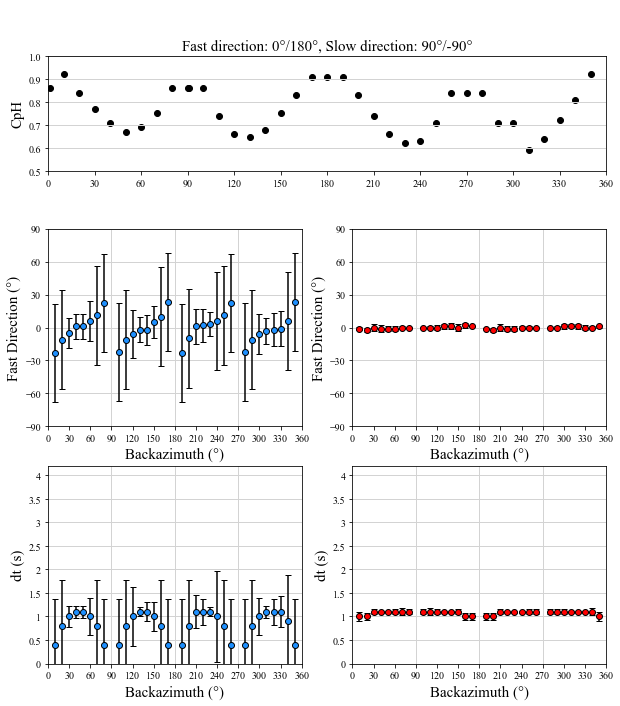

In [16]:
plt.rc('font',family='Times New Roman')
fig = plt.figure(figsize=(10,8))
ax1 = plt.subplot(221); ax2 = plt.subplot(222)
ax3 = plt.subplot(223); ax4 = plt.subplot(224)
ax5=fig.add_subplot(311)
ax5.set_position([0.125,0.98,0.775,0.2])


ax1.errorbar(result['baz'],result['RCphi'],yerr=result['RCdphi'],fmt='o',markeredgecolor='k',color ='dodgerblue' ,ecolor='k',capsize=3,label='SKS')
ax2.errorbar(result['baz'],result['SCphi'],yerr=result['SCdphi'],fmt='o',markeredgecolor='k',color ='r' ,ecolor='k',capsize=3,label='SKS')

phiPlot(ax1);phiPlot(ax2)

ax3.errorbar(result['baz'],result['RCdt'],yerr=result['RCddt'],fmt='o',markeredgecolor='k',color ='dodgerblue' ,ecolor='k',capsize=3,label='SKS')
ax4.errorbar(result['baz'],result['SCdt'],yerr=result['SCddt'],fmt='o',markeredgecolor='k',color ='r' ,ecolor='k',capsize=3,label='SKS')
dtPlot(ax3);dtPlot(ax4)

ax5.grid(axis='y',color='lightgrey',lw=1)
# ax5.hlines(y=0.9,xmin=0,xmax=360,color='r',linestyles='--',lw=1)
# ax5.hlines(y=0.8,xmin=0,xmax=360,color='r',linestyles='--',lw=1)
ax5.scatter(result['baz'],result['CpH'],color='k',linewidths=1)
ax5.set_xlim(0,360)
ax5.set_ylim(0.5,1)
ax5.set_ylabel('CpH',fontsize=15)

ax5.set_xticks(range(0,361,30))

ax5.set_title(f'\n\nFast direction: {FD}°/{FD+180}°, Slow direction: {FD+90}°/{FD-90}°',fontsize=15)

plt.savefig(f'{datapath}/XX.MOD/{time}/backazimuth_variation_v2.png',bbox_inches='tight')
plt.savefig(f'{datapath}/XX.MOD/{time}/backazimuth_variation_v2.pdf',bbox_inches='tight')